## NECESSARY IMPORTS AND VARIABLES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, cv2, time
#from albumentations import (Compose, ColorJitter, HorizontalFlip, RandomRotate90, ChannelDropout, GaussNoise, MotionBlur)
from keras.backend import clear_session
#import splitfolders
#import optuna
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from PIL import Image

import tensorflow as tf
from sklearn.model_selection import KFold

In [2]:
batch_size = 16
img_height = 224
img_width = 224
SIZE = 224
num_channels = 3 # RGB
#labels = ['No_Billboard', 'Billboard']
INPUT_SHAPE = (img_height, img_width)
SHAPE = (img_height, img_width, num_channels)

data_dir_path = "/python_programming/FYP_2022/billboard_dataset/output1/"

dataset = []  #Many ways to handle data, you can use pandas.
label = []  #Place holders to define add labels. We will add 0 to all no_billboards  images and 1 to billboards.

## LOADING IN THE DATA

In [3]:
no_bilboard_images = os.listdir(data_dir_path + 'No_Billboard/')
for i, image_name in enumerate(no_bilboard_images):    #Remember enumerate method adds a counter and returns the enumerate object

    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(data_dir_path + 'No_Billboard/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1
billboard_images = os.listdir(data_dir_path + 'Billboard/')
for i, image_name in enumerate(billboard_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(data_dir_path + 'Billboard/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset = np.array(dataset)
label = np.array(label)

(3020, 224, 224, 3)
(3020,)
Label for this image is:  1


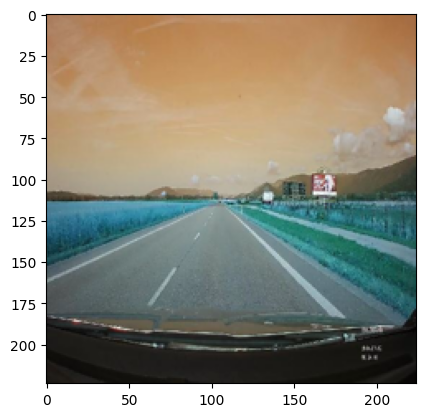

In [4]:
print(dataset.shape)
print(label.shape)


#Sanity check, view random few mages
import random
import numpy as np
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (224, 224, 3)))
print("Label for this image is: ", label[image_number])

In [5]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

#from keras.utils import normalize
#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)
X_train = X_train / 255.
X_test = X_test / 255.


# Reshape the features to fit the SVM model
X_train =  X_train.reshape(X_train.shape[0], -1)
X_test =  X_test.reshape(X_test.shape[0], -1)

#Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0) #labels

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []

## TRAINING SVM CLASSIFIER

In [6]:
start_time = time.time()

from sklearn.model_selection import cross_val_score

start_time = time.time()

svmclf_model = SVC(C= 0.42332835345253006, kernel="rbf", gamma=0.01, max_iter=100)
svmclf_model.fit(X_train, y_train)
y_pred = svmclf_model.predict(X_test)
accuracy_score(y_test, y_pred)

print ('train_score:', svmclf_model.score(X_train,y_train))
print ('test_score:', svmclf_model.score(X_test,y_test))


C:\Users\sukri\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


train_score: 0.6668046357615894
test_score: 0.5579470198675497


PREDICTIONS AND VISUALISATION OF MISCLASSIFIED IMAGES

In [7]:
##model_save_name = 'ALOS_svckfold.pt'
#path = f"/python_programming/FYP_2022/Models/{model_save_name}"

#svmclf_model.load_weights(path)

import pickle

# Save the model
with open('/python_programming/FYP_2022/Models/model/ALOS_svckfolds.pkl', 'wb') as f:
    pickle.dump(svmclf_model, f)

In [8]:
predictions = svmclf_model.predict(X_test)
actual_ylabel = y_test

#print("The prediction for this image is: ", predictions)
print("The actual label for this image is: ", actual_ylabel)

y_hat = predictions # We take the highest probability
print('prediction label:', y_hat)

#Compare the predictions and labels and get the accuracy
accuracy = np.mean(np.equal(actual_ylabel, y_hat))
print(f"Accuracy: {accuracy:.2f}")


The actual label for this image is:  [0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 

misclassified indices: [  0   1   4   5   9  21  22  26  28  29  32  33  35  36  38  39  43  46
  47  52  58  59  62  65  66  67  68  71  73  75  76  77  78  79  80  83
  89  90  93  96  98 100 102 103 106 107 114 116 117 120 122 126 127 128
 132 133 137 142 143 144 145 146 148 149 152 153 156 159 162 164 165 166
 171 175 177 178 181 183 184 186 187 191 197 198 202 203 205 210 213 215
 216 219 221 223 225 227 230 231 232 233 235 238 243 250 251 255 256 258
 261 263 264 269 272 273 276 278 281 283 284 292 294 296 297 298 299 307
 308 315 316 317 318 321 322 326 327 328 329 330 332 334 335 336 339 341
 342 356 359 360 361 362 363 364 365 370 372 374 375 376 377 378 379 381
 383 385 386 387 389 390 391 392 394 395 396 398 400 403 405 406 407 415
 418 419 422 424 425 426 427 431 436 437 438 440 445 446 447 449 453 454
 459 460 461 462 465 466 470 471 472 473 474 477 478 479 480 482 484 485
 486 488 489 490 492 494 495 496 498 499 501 505 510 511 514 518 522 526
 531 534 537 538 540 543 544

TypeError: ignored

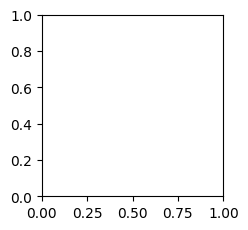

In [ ]:
# Compare y_hat to y_val
misclassified = []
label_comparison =  actual_ylabel == y_hat
misclassified = np.where(label_comparison == False)[0]  # Get the indices of misclassified images
print('misclassified indices:',misclassified)
print('no of missclassification:', len(misclassified))
plt.figure(figsize=(25, 25))
for i, index in enumerate(misclassified):
    ax =plt.subplot(9, 7, i+1)
    plt.imshow(X_test[index])
    plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[index], y_hat[index]))
    plt.axis('off')

In [ ]:
elapsed_time = time.time() - start_time
print(f"Elapsed time to complete training: {elapsed_time:.3f} seconds")

Elapsed time to complete training: 174.317 seconds


Calculate evaluation metric: Recall, Precision, Accuracy, F1score

In [ ]:
pre = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()
rootmsqrerror = tf.keras.metrics.RootMeanSquaredError()
auc_roc = tf.keras.metrics.AUC()

In [ ]:
tf.math.confusion_matrix(
    y_test,
    y_hat,
    num_classes=2,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 22, 263],
       [  4, 315]])>

In [ ]:
pre.update_state(y_test, y_hat)
rec.update_state(y_test, y_hat)
acc.update_state(y_test, y_hat)
rootmsqrerror.update_state(y_test, y_hat)
auc_roc.update_state(y_test, y_hat)


print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')
print(f'RMSE:{rootmsqrerror.result().numpy()}')
print(f'AUC:{auc_roc.result().numpy()}')

f1_score = 2 * (pre.result().numpy() * rec.result().numpy()) / (pre.result().numpy() + rec.result().numpy())

print(f'F1score:{f1_score}')

Precision:0.5449826717376709, Recall:0.9874607920646667, Accuracy:0.557947039604187
RMSE:0.6648706197738647
AUC:0.532326877117157
F1score:0.7023410533495428


Save the model

In [ ]:
#path = f"/python_programming/FYP_2022/Models/"
#svmclf_model.save(os.path.join(path, 'ALOS_svm_modelkfold.h5'))

#path = f"/python_programming/FYP_2022/Models/"
#new_model = tf.keras.models.load_model(os.path.join(path, 'ALOS_svm_modelkfold.h5'))

In [ ]:
newtest = cv2.imread('/python_programming/FYP_2022/billboard_dataset/output1/Billboard/scene_1223.jpg')
plt.imshow(newtest)
plt.show()

resize_newtest = cv2.resize(newtest, (224, 224))
plt.imshow(resize_newtest)
plt.show()
pred_newtest = np.expand_dims(resize_newtest/255, 0)
#print(pred_newtest)

y_pred_newtest = new_model.predict(pred_newtest)
print(y_pred_newtest)
y_pred_newtest = np.argmax(y_pred_newtest, axis = 1)
print(y_pred_newtest)

if y_pred_newtest > 0.5:
  print('Predicted class belongs to billboard class')

else:
  print('Predicted class belongs to no billboad class')

## TRAINING RANDOM FOREST CLASSIFIER

In [ ]:
'''
start_time = time.time()

fold_no = 1

num_folds = 10  # Number of splits for k-fold cross-validation
kf = KFold(n_splits=num_folds)


for train, test in kf.split(inputs, targets):
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    randomclf_model = RandomForestClassifier(n_estimators=73,criterion="log_loss", max_depth=100)
    randomclf_model.fit(X_train, y_train)
    y_pred = randomclf_model.predict(X_test)
    accuracy_score(y_test, y_pred)

  # Generate generalization metrics
    scores = randomclf_model.evaluate(X_test, y_test, verbose=0)
    print(f'Score for fold {fold_no}: {randomclf_model.metrics_names[0]} of {scores[0]}; {randomclf_model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

    # == Provide average scores ==
    print('------------------------------------------------------------------------')
    print('Score per fold')
    for i in range(0, len(acc_per_fold)):
      print('------------------------------------------------------------------------')
      print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
'''

In [9]:
randomclf_model = RandomForestClassifier(n_estimators=73,criterion="log_loss", max_depth=100)
randomclf_model.fit(X_train, y_train)
y_pred = randomclf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8129139072847682

PREDICTIONS AND VISUALISATION OF MISCLASSIFIED IMAGES

In [10]:
import pickle

# Save the model
with open('/python_programming/FYP_2022/Models/model/ALOS_randmfrstkfolds.pkl', 'wb') as f:
    pickle.dump(randomclf_model, f)

In [ ]:
predictions = randomclf_model.predict(X_test)
actual_ylabel = y_test

#print("The prediction for this image is: ", predictions)
print("The actual label for this image is: ", actual_ylabel)

y_hat = predictions # We take the highest probability
print('prediction label:', y_hat)

#Compare the predictions and labels and get the accuracy
accuracy = np.mean(np.equal(actual_ylabel, y_hat))
print(f"Accuracy: {accuracy:.2f}")

The actual label for this image is:  [0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 

misclassified indices: [  4   9  21  28  35  38  44  52  54  65  77  78  79  90  93  95 103 106
 111 114 120 129 132 144 151 153 155 156 160 166 171 175 178 183 185 186
 187 197 203 210 213 219 221 224 227 231 235 238 243 245 251 253 255 261
 264 269 284 296 308 311 313 321 322 324 325 328 329 333 340 349 351 356
 359 360 363 365 374 375 376 377 381 383 389 390 403 406 415 417 418 426
 428 434 436 438 442 445 446 447 460 461 466 470 479 492 494 505 511 517
 522 527 528 540 544 555 565 574 579 581 582 589 601 603]
no of missclassification: 122


TypeError: ignored

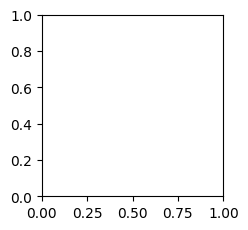

In [ ]:
# Compare y_hat to y_val
misclassified = []
label_comparison =  actual_ylabel == y_hat
misclassified = np.where(label_comparison == False)[0]  # Get the indices of misclassified images
print('misclassified indices:',misclassified)
print('no of missclassification:', len(misclassified))
plt.figure(figsize=(25, 25))
for i, index in enumerate(misclassified):
    ax =plt.subplot(9, 7, i+1)
    plt.imshow(X_test[index])
    plt.title("True label: {} \n Predicted label: {}".format(actual_ylabel[index], y_hat[index]))
    plt.axis('off')

In [ ]:
elapsed_time = time.time() - start_time
print(f"Elapsed time to complete training: {elapsed_time:.3f} seconds")

Elapsed time to complete training: 52.741 seconds


Calculate evaluation metric: Recall, Precision, Accuracy, F1score

In [ ]:
pre = tf.keras.metrics.Precision()
rec = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()
rootmsqrerror = tf.keras.metrics.RootMeanSquaredError()
auc_roc = tf.keras.metrics.AUC()

In [ ]:
tf.math.confusion_matrix(
    y_test,
    y_hat,
    num_classes=2,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[192,  93],
       [ 29, 290]])>

In [ ]:
pre.update_state(y_test, y_hat)
rec.update_state(y_test, y_hat)
acc.update_state(y_test, y_hat)
rootmsqrerror.update_state(y_test, y_hat)
auc_roc.update_state(y_test, y_hat)

print(f'Precision:{pre.result().numpy()}, Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')
print(f'RMSE:{rootmsqrerror.result().numpy()}')
print(f'AUC:{auc_roc.result().numpy()}')

f1_score = 2 * (pre.result().numpy() * rec.result().numpy()) / (pre.result().numpy() + rec.result().numpy())

print(f'F1score:{f1_score}')

Precision:0.7571801543235779, Recall:0.9090909361839294, Accuracy:0.7980132699012756
RMSE:0.44942936301231384
AUC:0.7913876175880432
F1score:0.8262108308987999


Save the model

In [ ]:
path = f"/python_programming/FYP_2022/Models/model/"
randomclf_model.save(os.path.join(path, 'ALOS_rndmforest_modelkfold.h5'))

new_model = tf.keras.models.load_model(os.path.join(path, 'ALOS_rndmforest_modelkfold.h5'))

In [ ]:
newtest = cv2.imread('/python_programming/FYP_2022/billboard_dataset/output1/Billboard/scene_1223.jpg')
plt.imshow(newtest)
plt.show()

resize_newtest = cv2.resize(newtest, (224, 224))
plt.imshow(resize_newtest)
plt.show()
pred_newtest = np.expand_dims(resize_newtest/255, 0)
#print(pred_newtest)

y_pred_newtest = new_model.predict(pred_newtest)
print(y_pred_newtest)
y_pred_newtest = np.argmax(y_pred_newtest, axis = 1)
print(y_pred_newtest)

if y_pred_newtest > 0.5:
  print('Predicted class belongs to billboard class')

else:
  print('Predicted class belongs to no billboad class')

SVM = 0.67 - 174.317 seconds
Random Forest  = 0.95 - 52.741 seconds